# Algorytm genetyczny
* Zastosowany rodzaj selekcji: ranking (w każdej kolejnej iteracji branych jest pod uwagę x najlepszych osobników z poprzedniej)
* Zastosowany rodzaj krzyżowania: OX (losowy fragment genów z jednego osobnika + węzły drugiego w kolejności ich występowania w jego genotypie)
* Zastosowana mutacja: swap (losowe przestawienie dwóch sąsiednich genów)

In [1]:
import subprocess
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import pandas as pd
from IPython.display import display
from enum import Enum

In [2]:
def AnalyseGEN(plot_name, files, expected_results, iterations=10,
               populationSize=10, mutationProbability = 0.05, crossesPerGeneration=50,
                drawPlot = True):
    """
    Uruchamia osobny proces obliczający wynik działania algorytmu genetycznego na podstawie danych.
    Zwraca tablicę z wynikami pomiarów oraz obliczony błąd pomiaru wyrażony w [%].
    drawPlot = True rysuje dodatkowo wykres
    """
    actual_results = []
    error = []
    
    index = 0
    for f in files:
        print("solving", f, end ="...")
        
        p1 = subprocess.Popen(
            ["../Debug/PEA_Projekt.exe",
             "GEN",
             "../Debug/Data/"+f+".txt",
             str(iterations),
             str(populationSize),
             str(mutationProbability),
             str(crossesPerGeneration),
             str(0)],
            stdout=subprocess.PIPE)
        
        text_result = p1.communicate()[0].strip()
        print("result", text_result, end ="...")
        single_result = float(text_result)
        actual_results.append(single_result)
        
        index+=1
        
    errors = [(abs(expected_results[x] - actual_results[x])) / expected_results[x] * 100
                   for x in range(len(actual_results))]
    
    avgError = sum(errors) / len(errors)
    
    resultTable = pd.DataFrame(
        {'baseFile' : files,
         'actual_results': actual_results,
         'expected_results': expected_results,
         'error': errors
        })
    
    if drawPlot:
        plt.rcParams['figure.figsize'] = [20, 5]
        fig, axes = plt.subplots()

        ind = np.arange(len(expected_results))
        width = 0.4   

        plt.bar(ind, expected_results, width, label='Wartosci globalnie minimalne')
        plt.bar(ind + width, actual_results, width,
            label='Wartosci obliczone przez algorytm')

        plt.ylabel('Wagi scieżek')
        plt.title(plot_name)

        plt.xticks(ind + width / 2, files)
        plt.legend(loc='best')

        plt.show()
    
    print("avgErr", avgError)
    
    return (resultTable, avgError)

In [3]:
files = ["TSP/data17", "TSP/data21", "TSP/data24", "TSP/data26", "TSP/data29", "TSP/data42", "TSP/data58", "TSP/data120"]
expected_results = [2085, 2707, 1272, 937, 1610, 699, 25395, 6942]

iterations_of_dependency_check = 40

In [4]:
class Parameter(Enum):
    POPULATION_SIZE = 1
    MUTATION_PROBABILITY = 2
    CROSSES_PER_GENERATION = 3

def parameterImpactAnalysis(multiplier = 1,
                            parameter = Parameter.POPULATION_SIZE,
                            iterations=2,
                            file=files[3],
                            expected_result=expected_results[3]):
    """
    Wyświetla wykres ilustrujący wpływ zmiany parametru na działanie algorytmu
    """
    avg_errs = []
    values_used = []
    for i in range(iterations):
        value_used = (i+1)*multiplier
        if(parameter == Parameter.POPULATION_SIZE):
            avg_errs.append(
                AnalyseGEN("Wpływ wielkości populacji na skuteczność algorytmu",
                           [file],
                           [expected_result],
                           iterations=100,
                           populationSize=value_used,
                           drawPlot=False)[1])
        elif(parameter == Parameter.MUTATION_PROBABILITY):
            avg_errs.append(
                AnalyseGEN("Wpływ prawodopodobieństwa mutacji na skuteczność algorytmu",
                           [file],
                           [expected_result],
                           iterations=100,
                           populationSize=50,
                           mutationProbability=value_used,
                           drawPlot=False)[1])
        elif(parameter == Parameter.CROSSES_PER_GENERATION):
            avg_errs.append(
                AnalyseGEN("Wpływ ilości potomstwa na skuteczność algorytmu",
                           [file],
                           [expected_result],
                           iterations=100,
                           populationSize=50,
                           crossesPerGeneration=value_used,
                           drawPlot=False)[1])
        values_used.append(value_used)
        
    print(avg_errs)

    plot, ax = plt.subplots()
    ax.set_ylabel("Odchylenie od wartości opt. [%]")
    ax.set_xlabel("Wartość modyfikowanego parametru")
    #plot.plot(values_used, avg_errs)
    
    # trendline
    z = np.polyfit(values_used, avg_errs, 1)
    p = np.poly1d(z)
    
    plt.plot(values_used, avg_errs, values_used, p(values_used),"b--")
    plt.show()
    

## Zależność dokładności algorytmu od wielkości populacji

solving TSP/data24...result b'1485'...avgErr 16.745283018867923
solving TSP/data24...result b'1703'...avgErr 33.88364779874214
solving TSP/data24...result b'1562'...avgErr 22.79874213836478
solving TSP/data24...result b'1659'...avgErr 30.424528301886795
solving TSP/data24...result b'1483'...avgErr 16.58805031446541
solving TSP/data24...result b'1676'...avgErr 31.761006289308174
solving TSP/data24...result b'1516'...avgErr 19.18238993710692
solving TSP/data24...result b'1402'...avgErr 10.220125786163523
solving TSP/data24...result b'1559'...avgErr 22.562893081761008
solving TSP/data24...result b'1575'...avgErr 23.82075471698113
solving TSP/data24...result b'1533'...avgErr 20.5188679245283
solving TSP/data24...result b'1677'...avgErr 31.839622641509436
solving TSP/data24...result b'1448'...avgErr 13.836477987421384
solving TSP/data24...result b'1611'...avgErr 26.650943396226417
solving TSP/data24...result b'1491'...avgErr 17.21698113207547
solving TSP/data24...result b'1546'...avgErr 21.

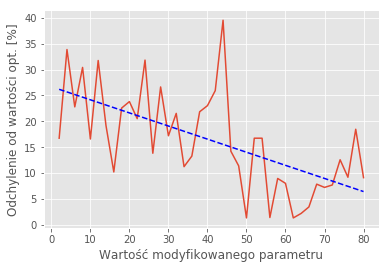

In [5]:
parameterImpactAnalysis(2,
                        Parameter.POPULATION_SIZE,
                        iterations=iterations_of_dependency_check,
                        # iterations=3,
                        file=files[2],
                        expected_result=expected_results[2])

## Zależność dokładności algorytmu od prawdopodobieństwa mutacji

solving TSP/data24...result b'1489'...avgErr 17.059748427672954
solving TSP/data24...result b'1319'...avgErr 3.6949685534591192
solving TSP/data24...result b'1368'...avgErr 7.547169811320755
solving TSP/data24...result b'1272'...avgErr 0.0
solving TSP/data24...result b'1523'...avgErr 19.732704402515726
solving TSP/data24...result b'1495'...avgErr 17.531446540880502
solving TSP/data24...result b'1457'...avgErr 14.544025157232705
solving TSP/data24...result b'1286'...avgErr 1.10062893081761
solving TSP/data24...result b'1466'...avgErr 15.251572327044025
solving TSP/data24...result b'1499'...avgErr 17.845911949685533
solving TSP/data24...result b'1626'...avgErr 27.830188679245282
solving TSP/data24...result b'1377'...avgErr 8.254716981132075
solving TSP/data24...result b'1523'...avgErr 19.732704402515726
solving TSP/data24...result b'1329'...avgErr 4.481132075471698
solving TSP/data24...result b'1392'...avgErr 9.433962264150944
solving TSP/data24...result b'1412'...avgErr 11.0062893081761

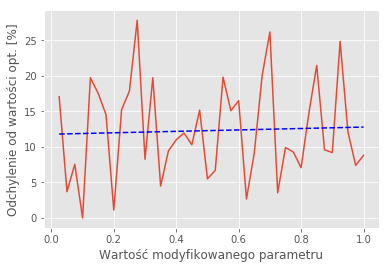

In [6]:
parameterImpactAnalysis(0.025,
                        Parameter.MUTATION_PROBABILITY,
                        iterations=iterations_of_dependency_check,
                        file=files[2],
                        expected_result=expected_results[2])

## Zależność dokładności algorytmu od ilości potomstwa każdej z generacji 

solving TSP/data24...result b'1985'...avgErr 56.05345911949685
solving TSP/data24...result b'1696'...avgErr 33.33333333333333
solving TSP/data24...result b'1570'...avgErr 23.427672955974842
solving TSP/data24...result b'1423'...avgErr 11.871069182389938
solving TSP/data24...result b'1439'...avgErr 13.128930817610062
solving TSP/data24...result b'1399'...avgErr 9.984276729559749
solving TSP/data24...result b'1353'...avgErr 6.367924528301887
solving TSP/data24...result b'1525'...avgErr 19.88993710691824
solving TSP/data24...result b'1537'...avgErr 20.833333333333336
solving TSP/data24...result b'1404'...avgErr 10.377358490566039
solving TSP/data24...result b'1510'...avgErr 18.71069182389937
solving TSP/data24...result b'1409'...avgErr 10.770440251572328
solving TSP/data24...result b'1317'...avgErr 3.5377358490566038
solving TSP/data24...result b'1403'...avgErr 10.29874213836478
solving TSP/data24...result b'1454'...avgErr 14.30817610062893
solving TSP/data24...result b'1431'...avgErr 12.

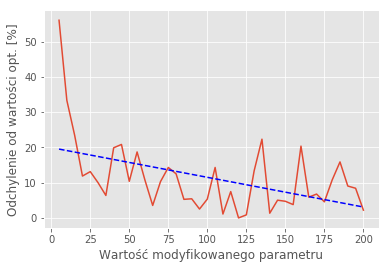

In [7]:
parameterImpactAnalysis(5,
                        Parameter.CROSSES_PER_GENERATION,
                        iterations=iterations_of_dependency_check,
                        file=files[2],
                        expected_result=expected_results[2])

## Porównanie wyników uzyskanych przez algorytm z wynikami optymalnymi dla przykładowych zestawów danych

solving TSP/data17...result b'2210'...solving TSP/data21...result b'3048'...solving TSP/data24...result b'1300'...solving TSP/data26...result b'937'...solving TSP/data29...result b'1786'...solving TSP/data42...result b'1066'...solving TSP/data58...result b'40580'...solving TSP/data120...result b'24631'...

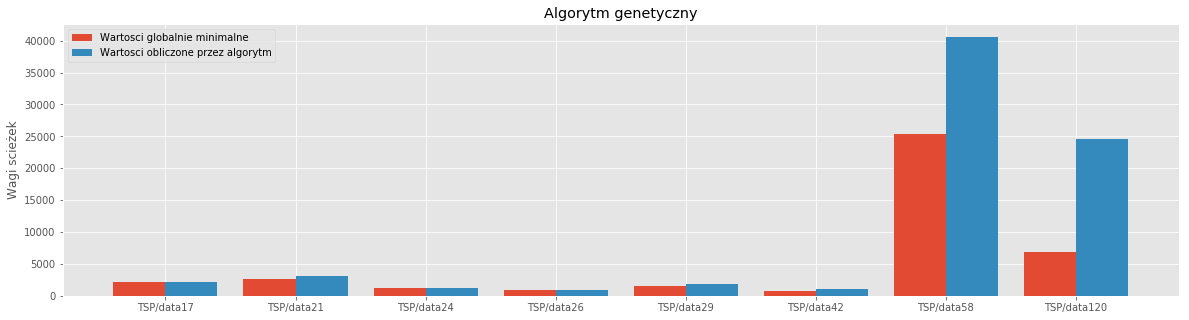

avgErr 49.85440186617336


,baseFile,actual_results,expected_results,error
0,TSP/data17,2210.0,2085,5.995204
1,TSP/data21,3048.0,2707,12.596971
2,TSP/data24,1300.0,1272,2.201258
3,TSP/data26,937.0,937,0.000000
4,TSP/data29,1786.0,1610,10.931677
5,TSP/data42,1066.0,699,52.503577
6,TSP/data58,40580.0,25395,59.795235
7,TSP/data120,24631.0,6942,254.811294


In [8]:
display(AnalyseGEN("Algorytm genetyczny", files, expected_results, iterations=100, populationSize=100)[0])